In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [14]:
dataset.shape

(813, 75)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,335852.0,-652406.0,-916765.0,1366289.0,0.08,3.9,0.11,3.82,0.18,3.64
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,-652406.0,NaN,1366289.0,NaN,3.90,NaN,3.82,NaN,3.64,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'F1_RolledPrice',
 'F2_RolledPrice',
 'F3_RolledPrice',
 'F1_RolledPrice_rolling_20D_volatility',
 'F2_RolledPrice_rolling_20D_volatility',
 'F3_RolledPrice_rolling_20D_volatility',
 'SyntheticF1MinusF2_RolledPrice',
 'prior_report_SyntheticF1MinusF2_RolledPrice_change',
 'prior_cumulative_5D_F1_V

In [17]:
dataset['Commercial_NetPosition'].describe()

count       813.000000
mean     -11247.533825
std      156021.927084
min     -315658.000000
25%     -146916.000000
50%       13553.000000
75%       95631.000000
max      368688.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       813.000000
mean     405093.035670
std      162420.952528
min      100633.000000
25%      273760.000000
50%      366026.000000
75%      518079.000000
max      848584.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

0

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
# for name in [ 'prior_cumulative_5D_F1_Volume',
#                  'prior_cumulative_5D_F2_Volume',
#                  'prior_cumulative_5D_F1MinusF2_Volume' ,
#             'F1_RolledPrice',
#  'F2_RolledPrice',
#  'F3_RolledPrice']:
#     dataset[f'{name}_change'] = dataset[name] - dataset[name].shift(1)
#     dataset[f'next_{name}_change'] =  dataset[name].shift(-1) - dataset[name] 
    
    

In [23]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'F1_RolledPrice',
 'F2_RolledPrice',
 'F3_RolledPrice',
 'F1_RolledPrice_rolling_20D_volatility',
 'F2_RolledPrice_rolling_20D_volatility',
 'F3_RolledPrice_rolling_20D_volatility',
 'SyntheticF1MinusF2_RolledPrice',
 'prior_report_SyntheticF1MinusF2_RolledPrice_change',
 'prior_cumulative_5D_F1_V

In [24]:
unscaled_response_names= ['ManagedMoney_NetPosition_change',
                          'ManagedMoney_LongPosition_change',
                          'ManagedMoney_ShortPosition_change']
scaled_response_names = ['ManagedMoney_NetPosition_to_openinterest_change',
                         'ManagedMoney_LongPosition_to_openinterest_change',
                         'ManagedMoney_ShortPosition_to_openinterest_change']
feature_names =  ['prior_report_ManagedMoney_NetPosition_change',
                  'prior_report_ManagedMoney_LongPosition_change',
                  'prior_report_ManagedMoney_ShortPosition_change',
                  'prior_report_ManagedMoney_NetPosition_to_openinterest_change',
                  'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
                  'prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
                  'prior_report_SyntheticF1MinusF2_RolledPrice_change',
                  'prior_cumulative_5D_F1_Volume_change',
                  'prior_cumulative_5D_F2_Volume_change',
                  'prior_cumulative_5D_F1MinusF2_Volume_change',
                  'prior_5D_F1_OI_change',
                  'prior_5D_F2_OI_change',
                  'prior_5D_AGG_OI_change',
                  'prior_5D_F1MinusF2_openinterest_change',
                  'F1_RolledPrice_rolling_20D_volatility',
                  'F2_RolledPrice_rolling_20D_volatility',
                  'F3_RolledPrice_rolling_20D_volatility',
                  'F1_RolledPrice_change',
                  'F2_RolledPrice_change',
                  'F3_RolledPrice_change'
                 
                 ]

In [25]:
?get_features_responses_correlation

Signature:
get_features_responses_correlation(
    dataset: pandas.core.frame.DataFrame,
    features: list[str],
    responses: list[str],
    method: str = 'spearman',
) -> pandas.core.frame.DataFrame
Docstring: " Computes the correlation between a list of features and a list of responses 
File:      ~/Documents/Projects/omroot_repos/COTAME/research/metrics.py
Type:      function

In [26]:
get_features_responses_correlation(dataset = dataset,
                                   features = feature_names,
                                   responses=unscaled_response_names).sort_values(by = unscaled_response_names[0])

,Feature,ManagedMoney_NetPosition_change,ManagedMoney_LongPosition_change,ManagedMoney_ShortPosition_change
2,prior_report_ManagedMoney_ShortPosition_change,-0.106091,-0.070016,0.052160
5,prior_report_ManagedMoney_ShortPosition_to_ope...,-0.101940,-0.066454,0.051725
7,prior_cumulative_5D_F1_Volume_change,-0.082255,0.051661,0.169758
9,prior_cumulative_5D_F1MinusF2_Volume_change,-0.070258,0.059023,0.157437
14,F1_RolledPrice_rolling_20D_volatility,-0.056452,-0.087253,0.000475
15,F2_RolledPrice_rolling_20D_volatility,-0.054038,-0.082386,0.002839
16,F3_RolledPrice_rolling_20D_volatility,-0.053886,-0.080187,0.004442
13,prior_5D_F1MinusF2_openinterest_change,-0.050116,-0.009254,0.068659
10,prior_5D_F1_OI_change,-0.047568,0.020953,0.095505
6,prior_report_SyntheticF1MinusF2_RolledPrice_ch...,-0.037126,-0.015644,0.030848


In [38]:
get_features_responses_correlation(dataset = dataset,
                                   features = feature_names,
                                   responses=scaled_response_names).sort_values(by = scaled_response_names[0])

,Feature,ManagedMoney_NetPosition_to_openinterest_change,ManagedMoney_LongPosition_to_openinterest_change,ManagedMoney_ShortPosition_to_openinterest_change
12,prior_5D_AGG_OI_change,-0.314262,-0.454496,-0.097046
9,prior_cumulative_5D_F1MinusF2_Volume_change,-0.282576,-0.342704,0.016732
7,prior_cumulative_5D_F1_Volume_change,-0.281488,-0.323862,0.033818
10,prior_5D_F1_OI_change,-0.152639,-0.174229,0.038887
13,prior_5D_F1MinusF2_openinterest_change,-0.118932,-0.134324,0.038772
5,prior_report_ManagedMoney_ShortPosition_to_ope...,-0.100530,-0.067581,0.038741
2,prior_report_ManagedMoney_ShortPosition_change,-0.097409,-0.062937,0.032672
6,prior_report_SyntheticF1MinusF2_RolledPrice_ch...,-0.044352,-0.046244,0.024694
14,F1_RolledPrice_rolling_20D_volatility,-0.002773,0.007551,0.031008
16,F3_RolledPrice_rolling_20D_volatility,-0.001407,0.014512,0.033624


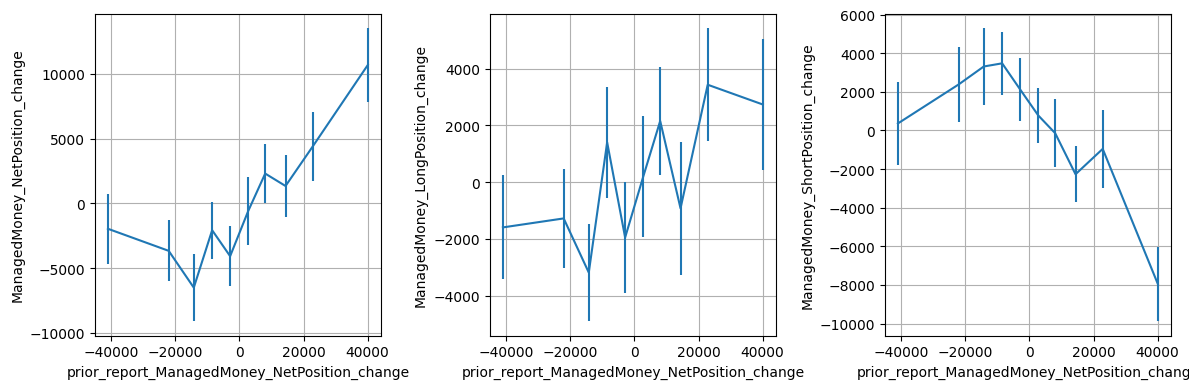

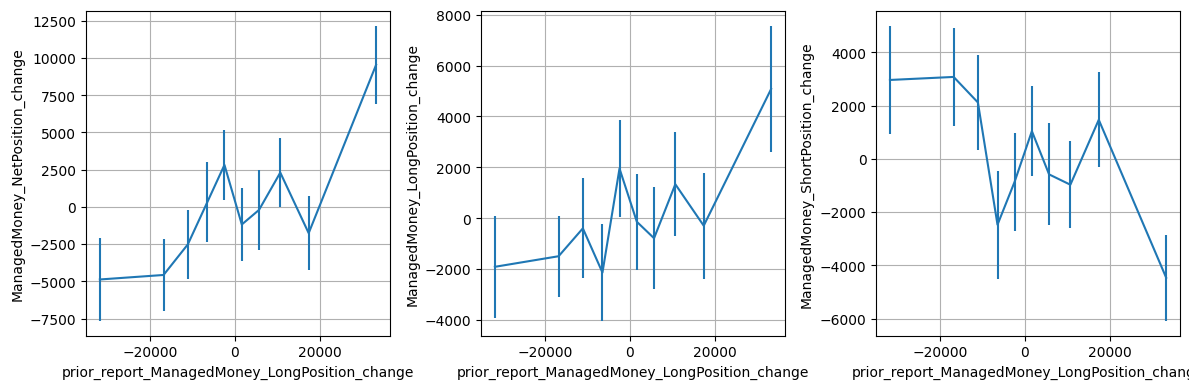

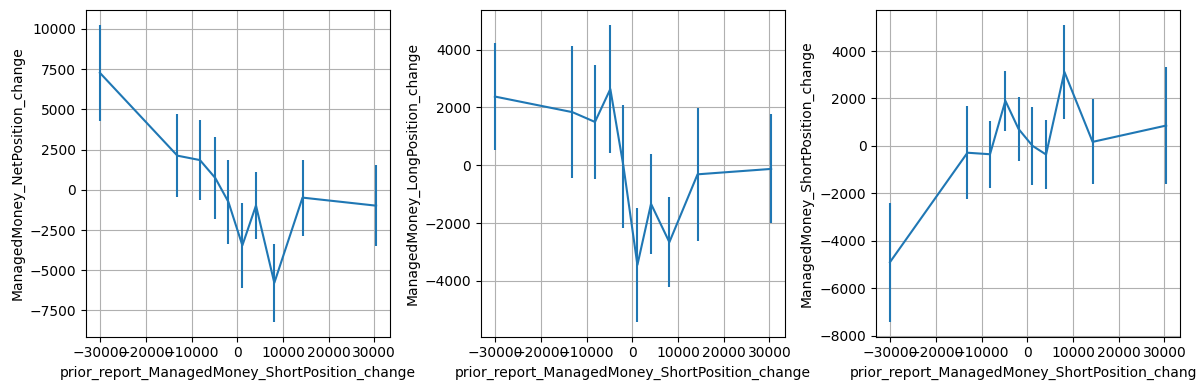

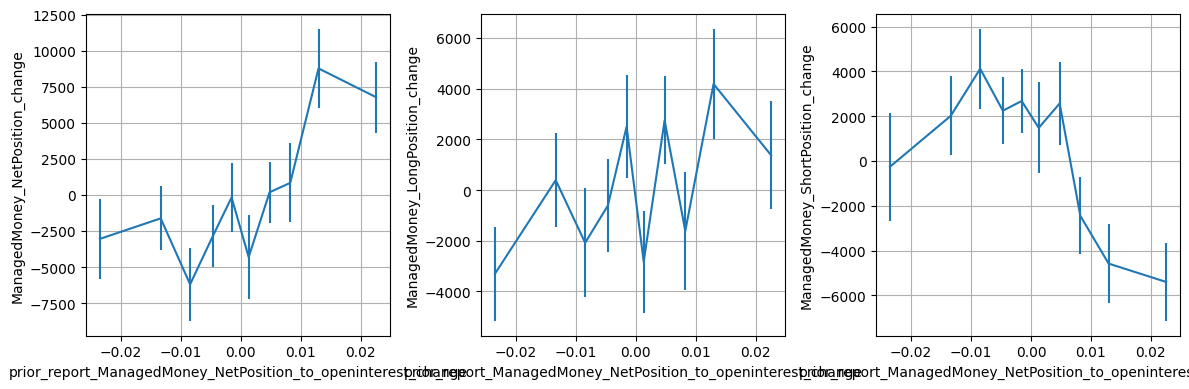

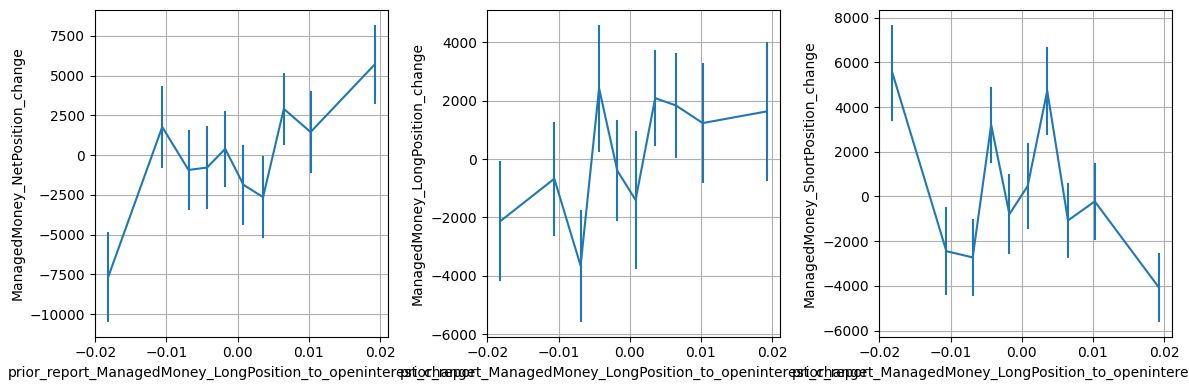

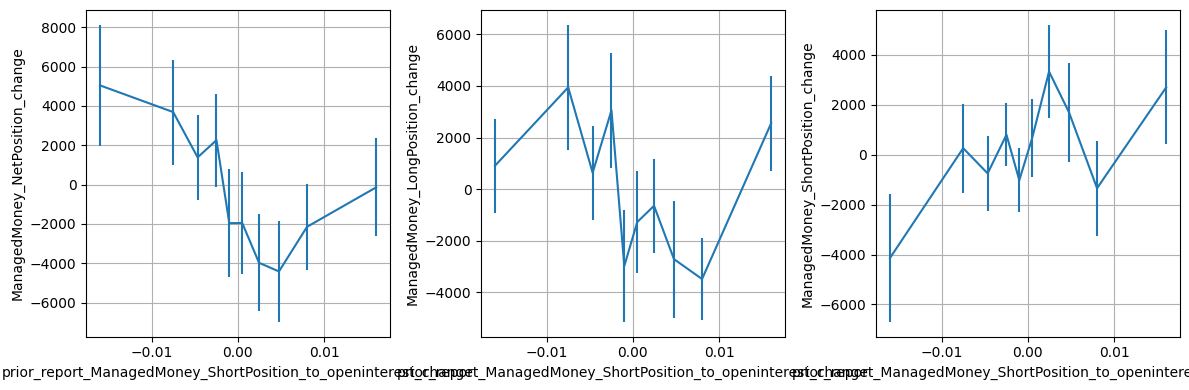

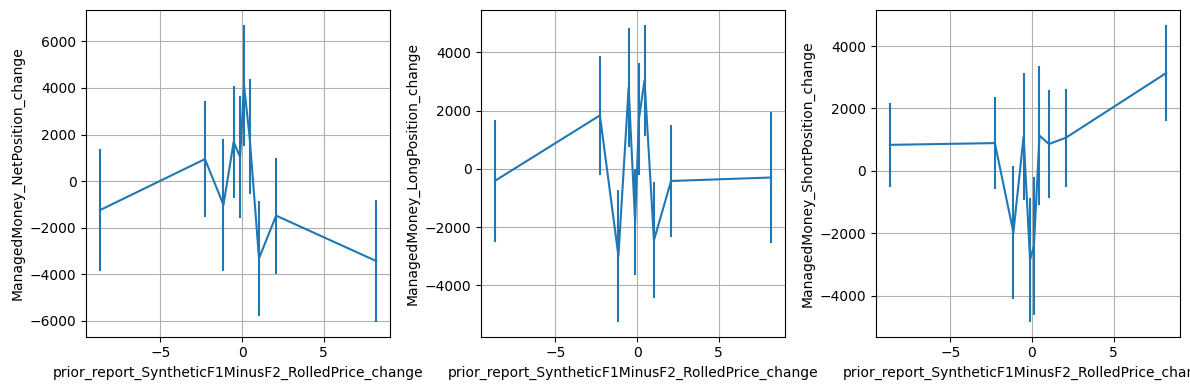

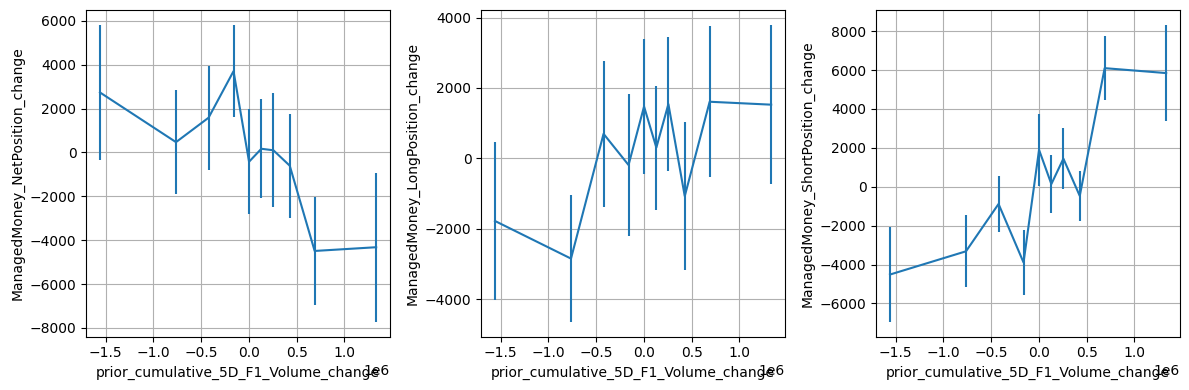

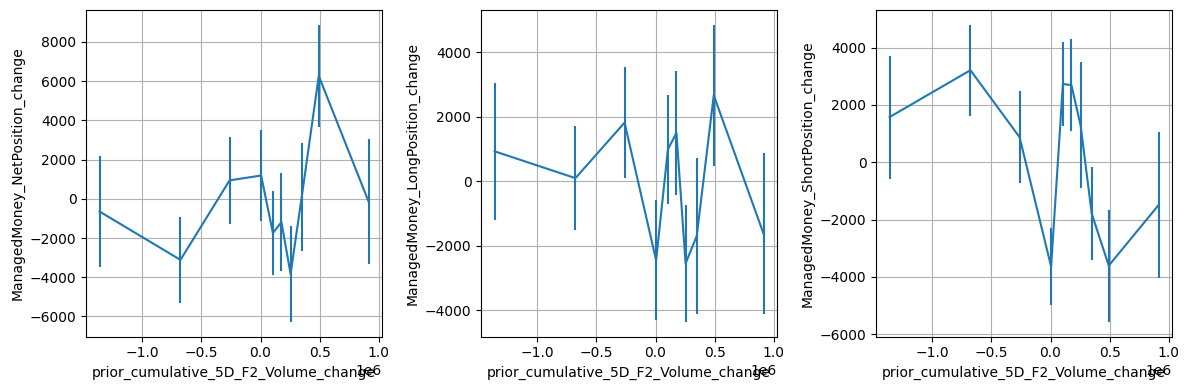

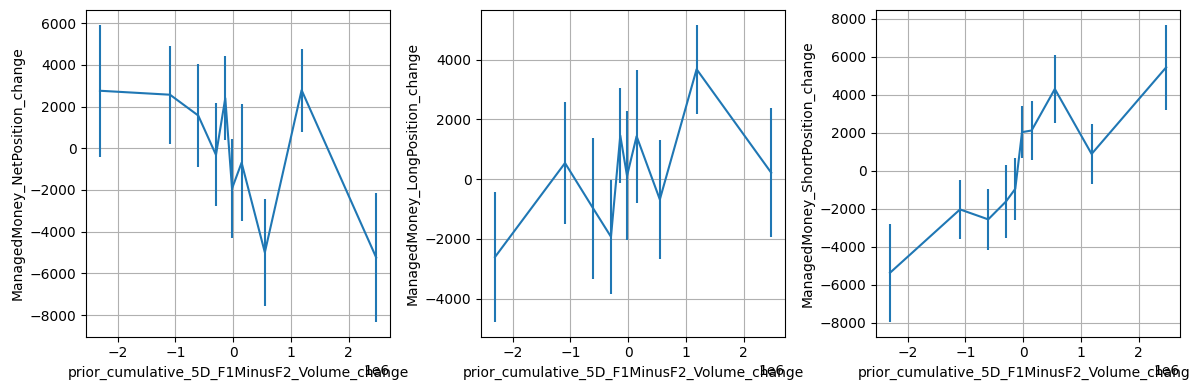

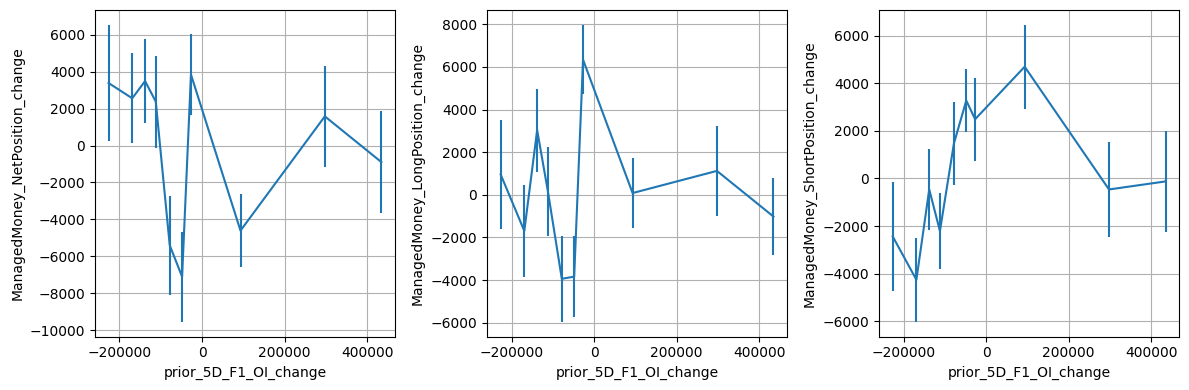

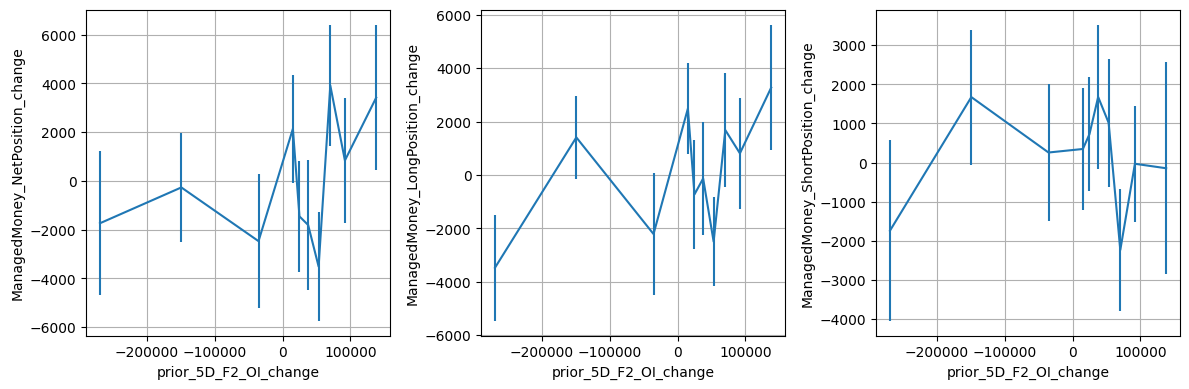

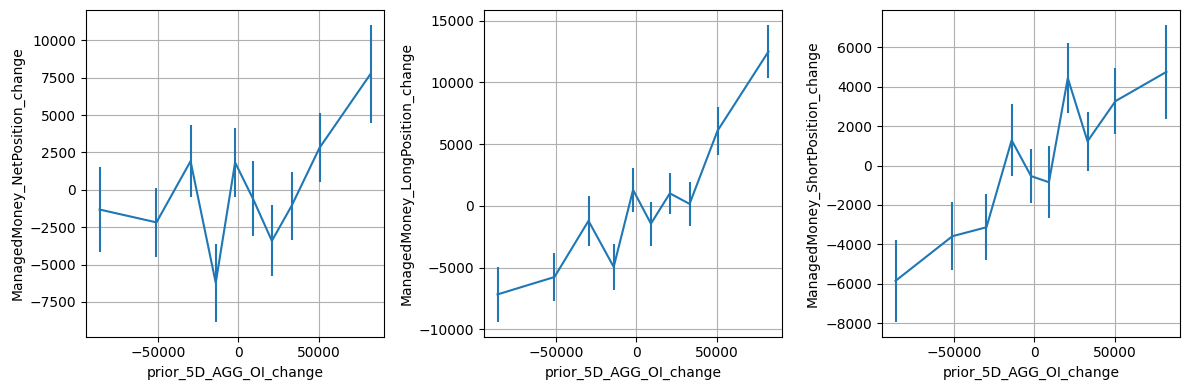

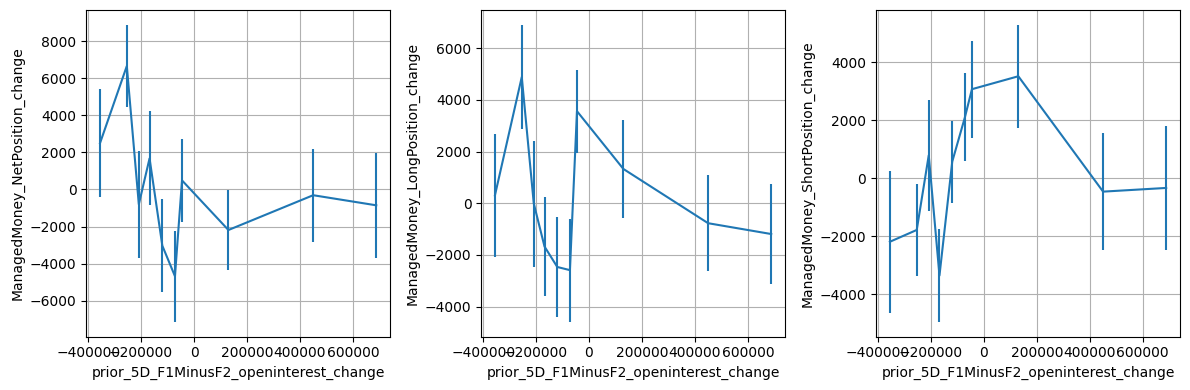

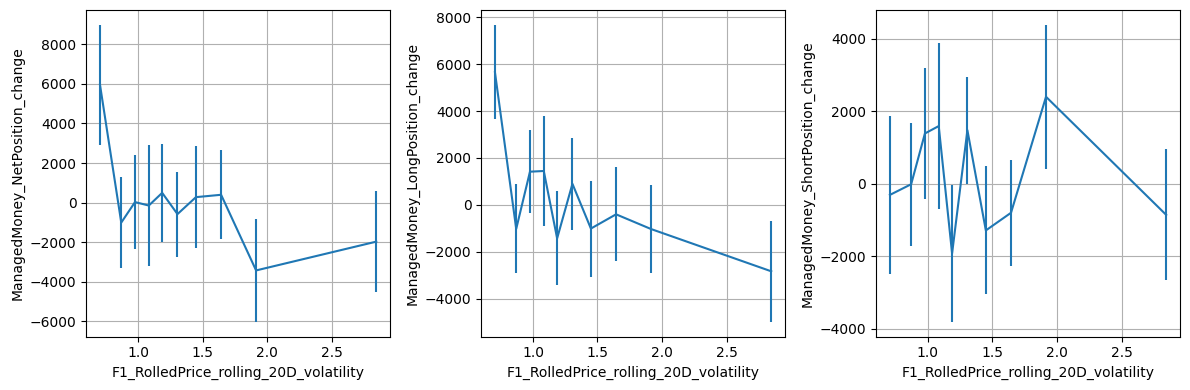

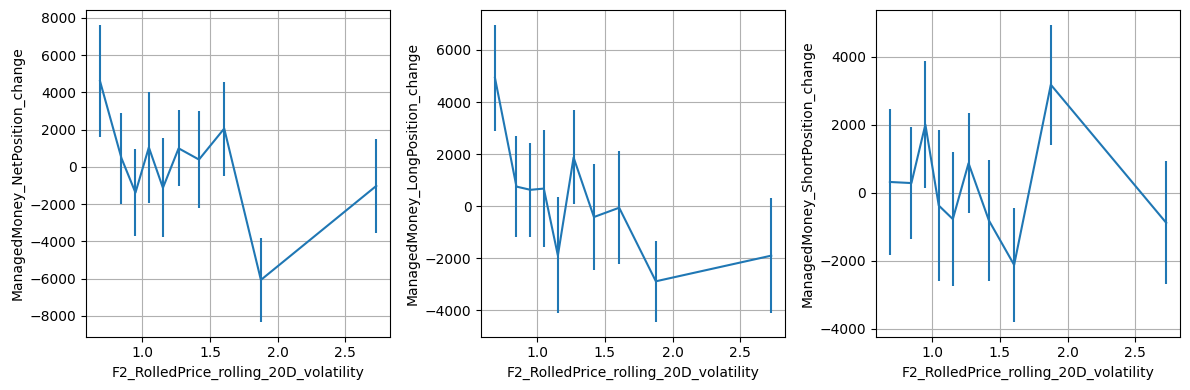

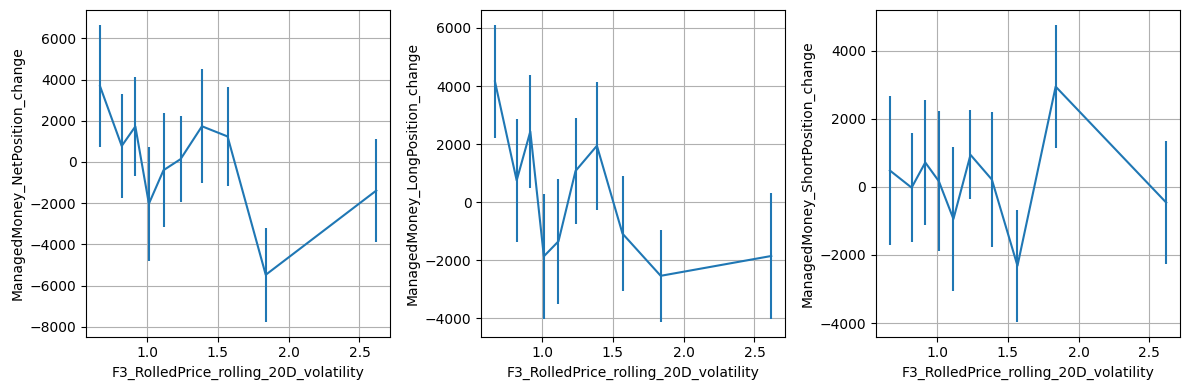

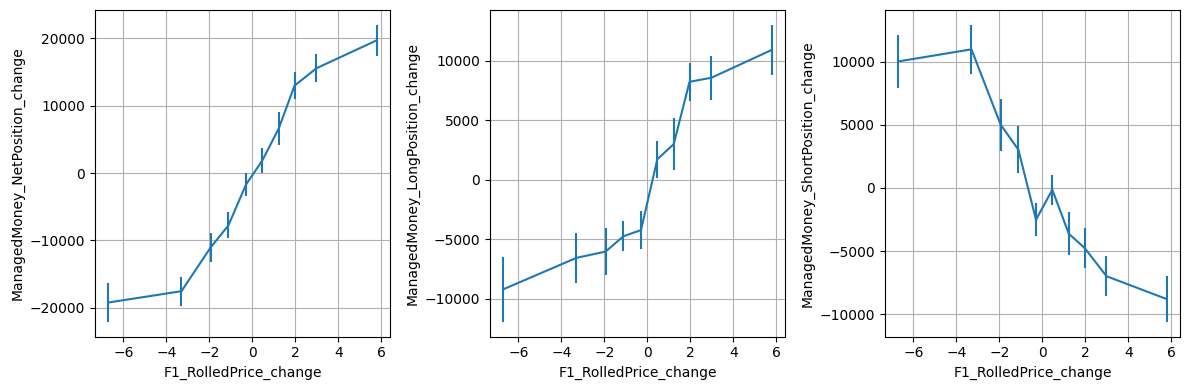

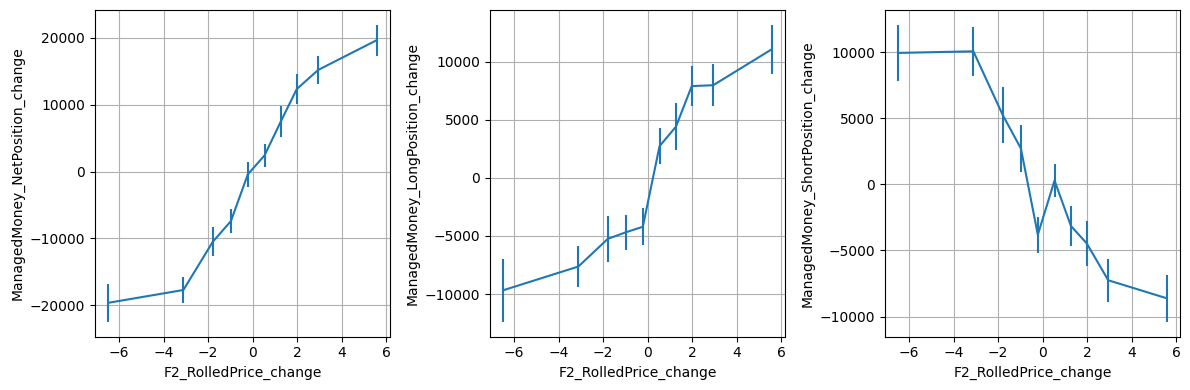

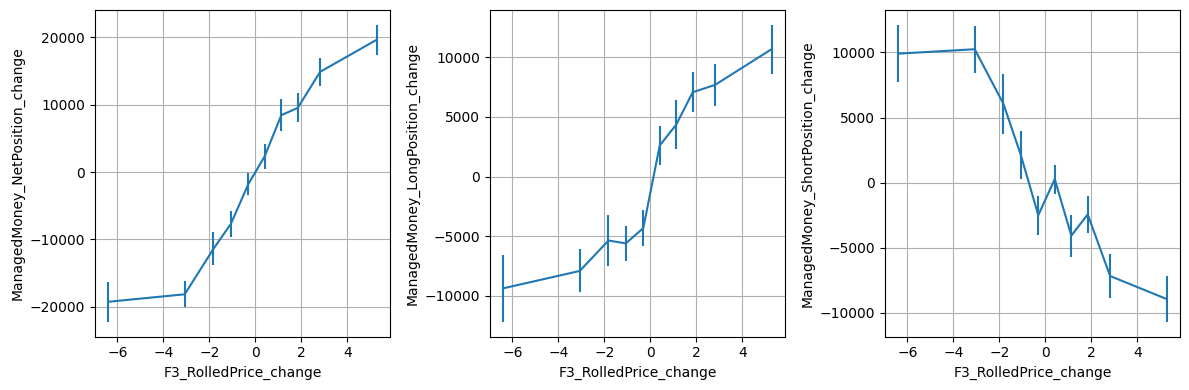

In [45]:
for  f  in feature_names:
    plt.rcParams["figure.figsize"] = (12,4)
    plt.subplot(1, 3, 1)
    _=plot_bin_summary_of_xy(
                    x = dataset[f],
                    y = dataset['ManagedMoney_NetPosition_change'],
                    k= 10 ,
        xlabel = f, 
        ylabel = 'ManagedMoney_NetPosition_change'
      )
    plt.grid()
    plt.subplot(1, 3, 2)
    _=plot_bin_summary_of_xy(
                        x = dataset[f],
                        y = dataset['ManagedMoney_LongPosition_change'],
                        k= 10 ,
            xlabel = f, 
            ylabel = 'ManagedMoney_LongPosition_change'
          )
    plt.grid()
    plt.subplot(1, 3, 3)
    _=plot_bin_summary_of_xy(
                        x = dataset[f],
                        y = dataset['ManagedMoney_ShortPosition_change'],
                        k= 10 ,
            xlabel = f, 
            ylabel = 'ManagedMoney_ShortPosition_change'
          )
    plt.tight_layout()
    plt.grid()
    plt.show()
    plt.close()

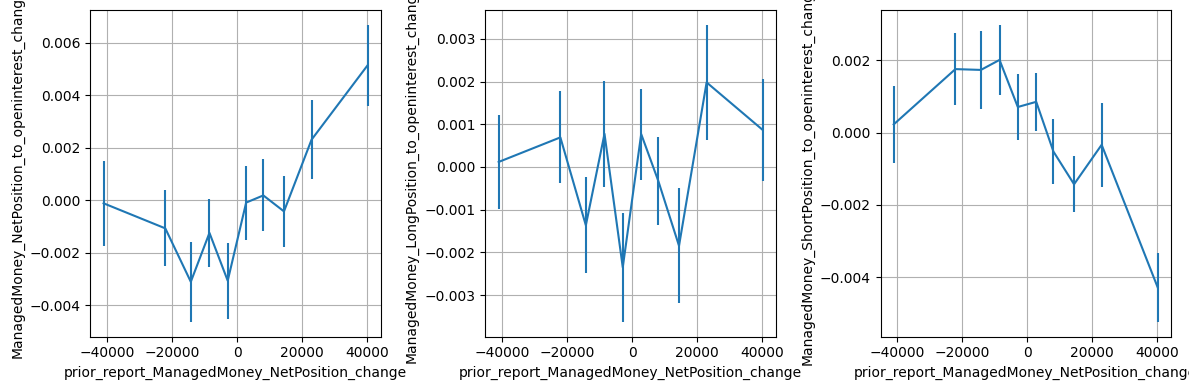

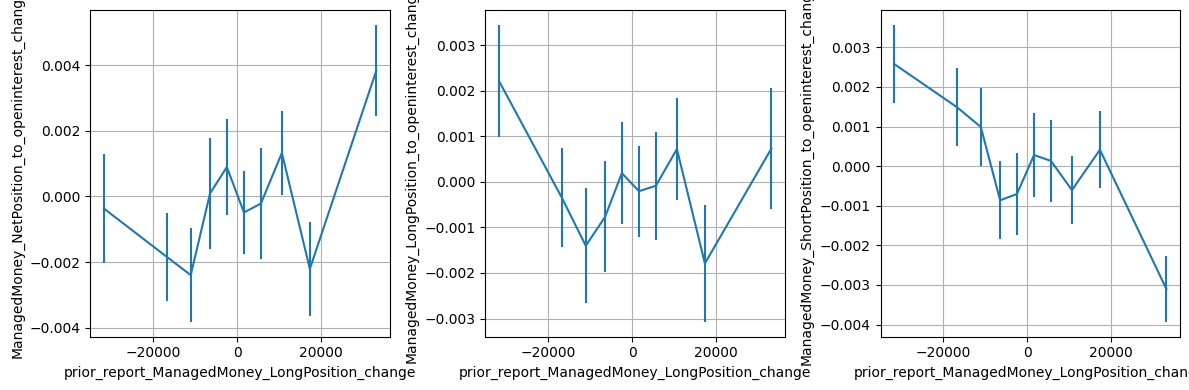

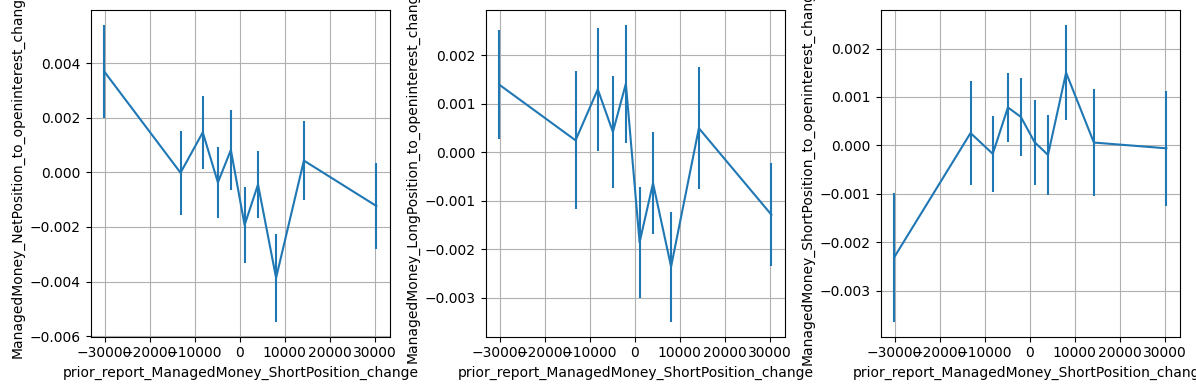

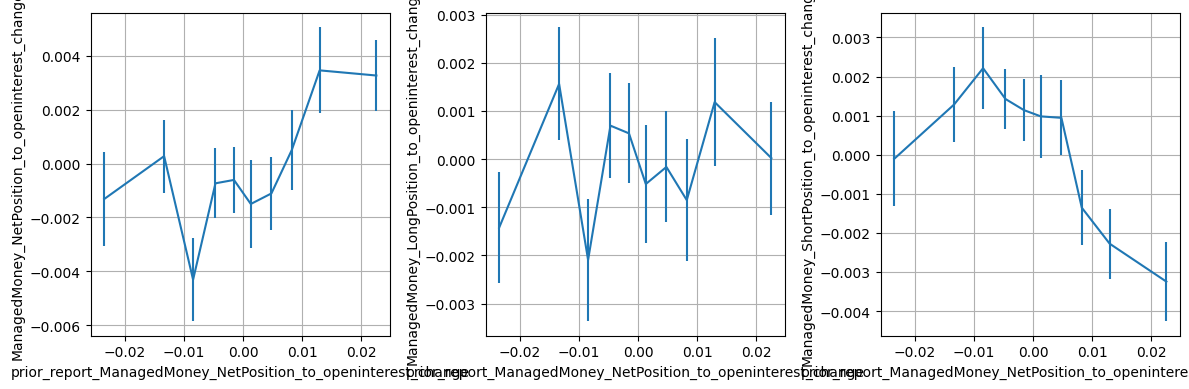

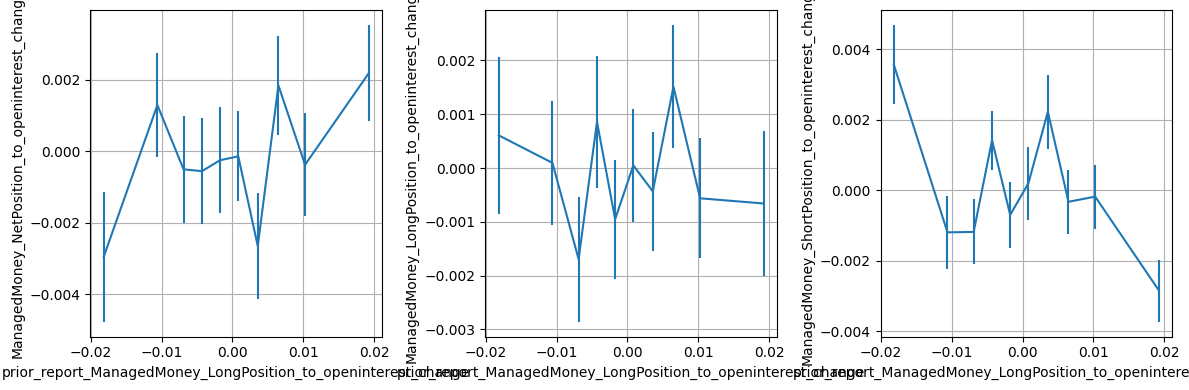

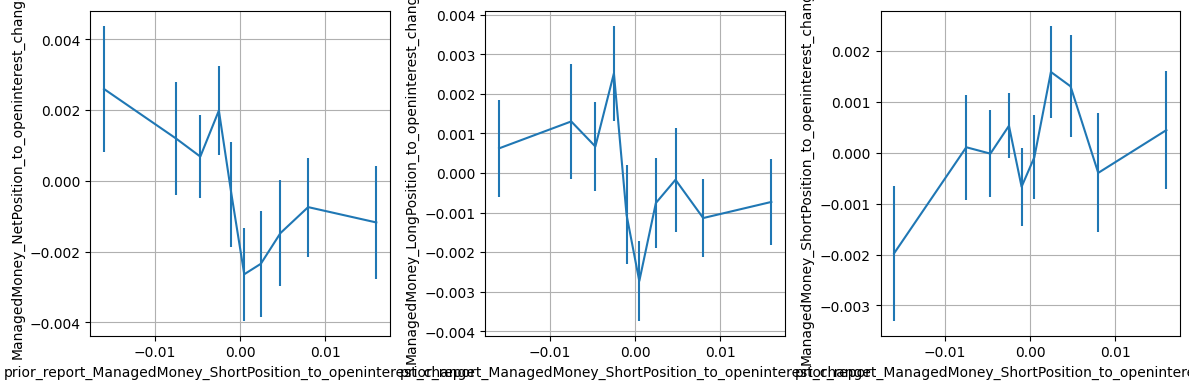

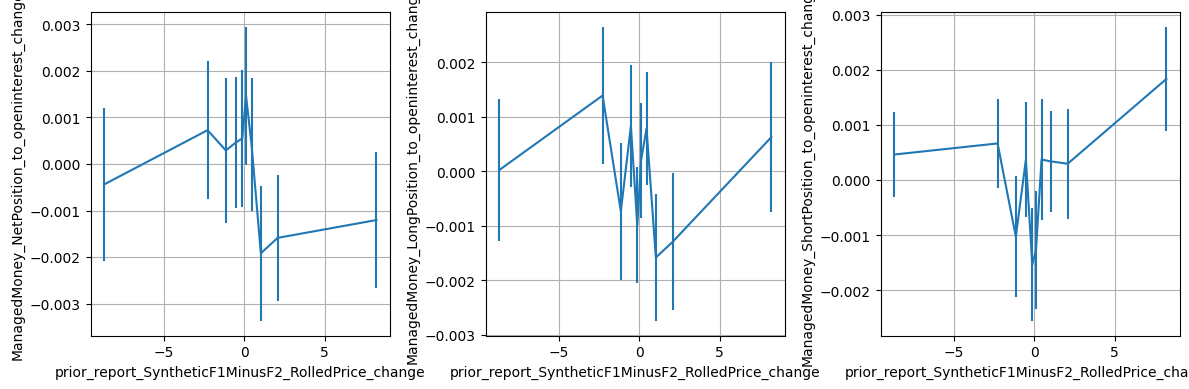

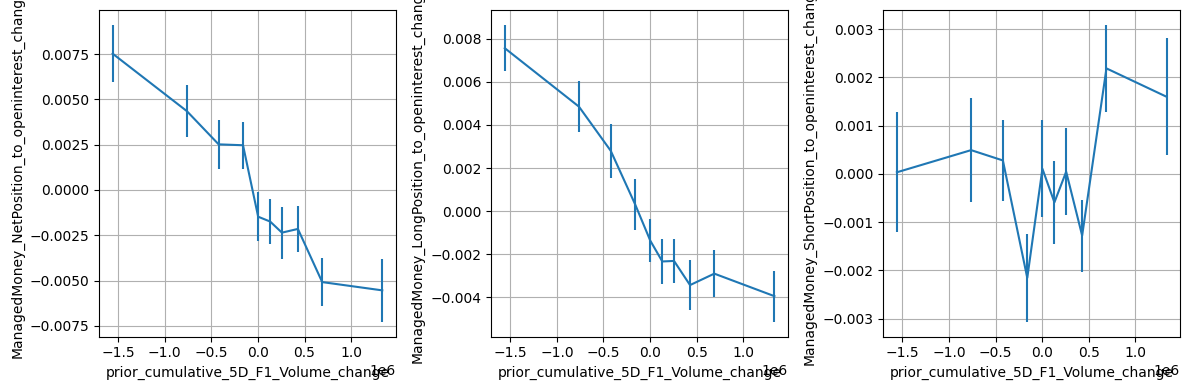

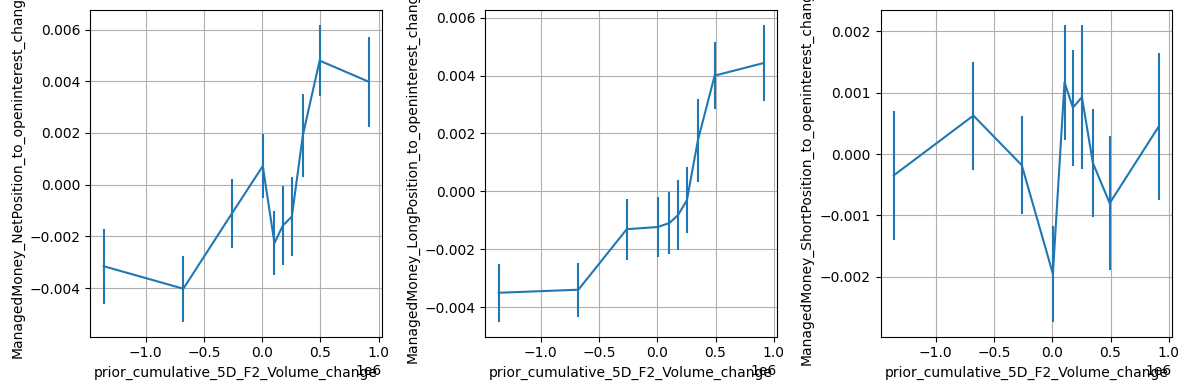

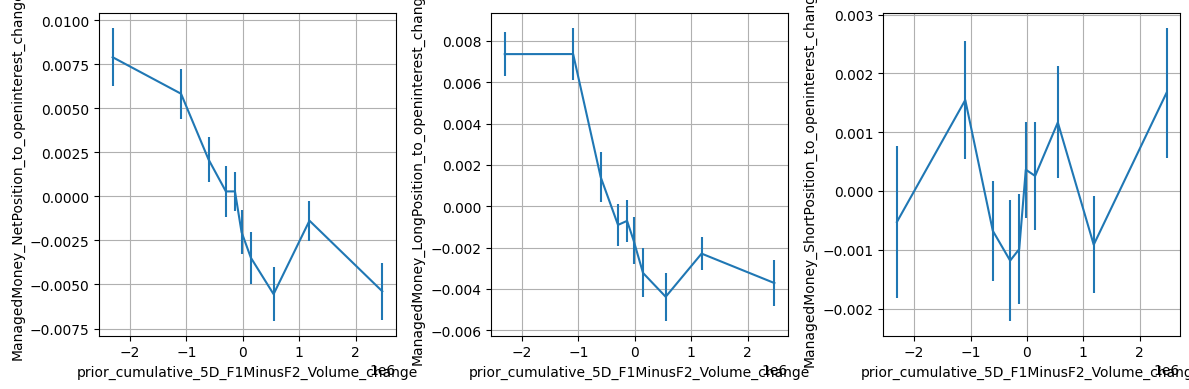

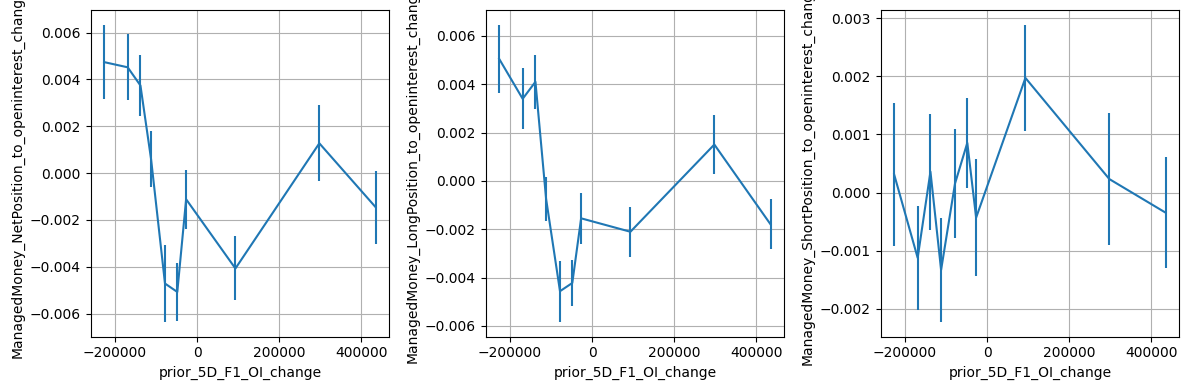

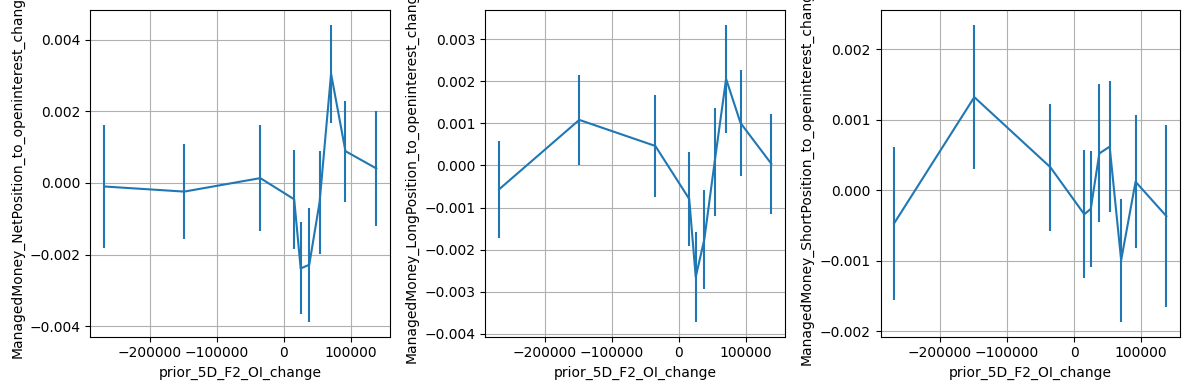

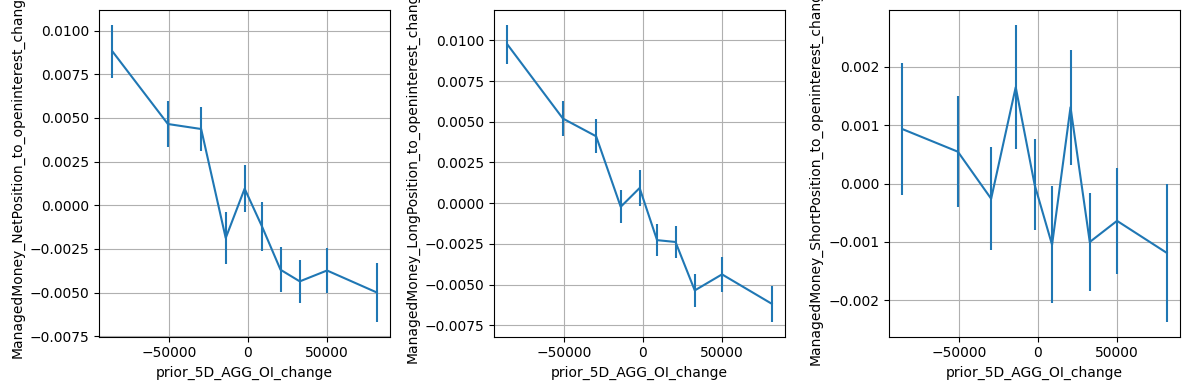

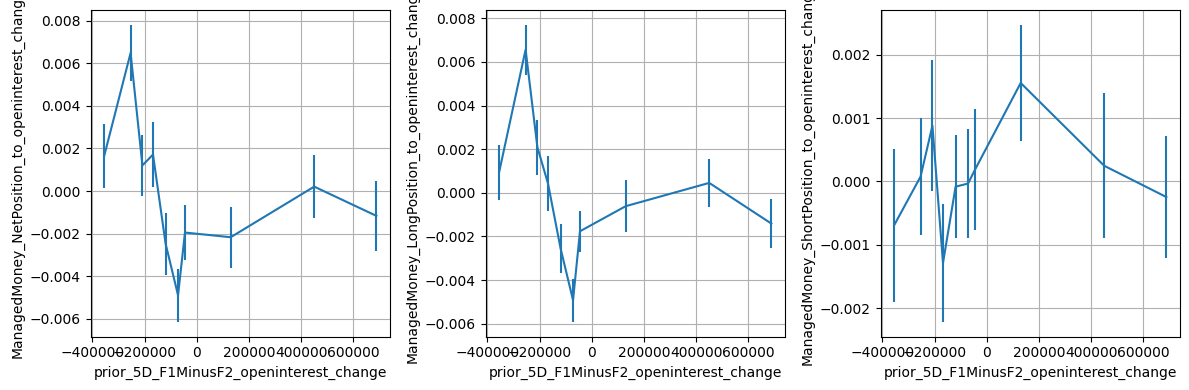

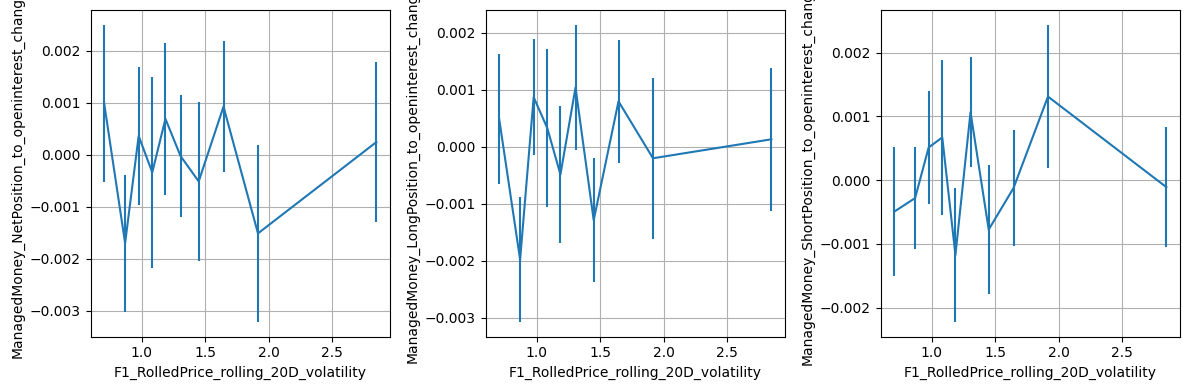

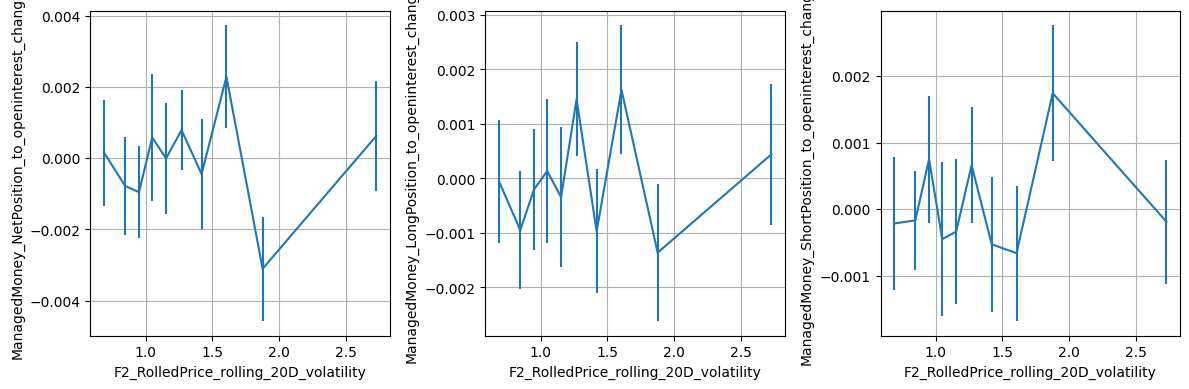

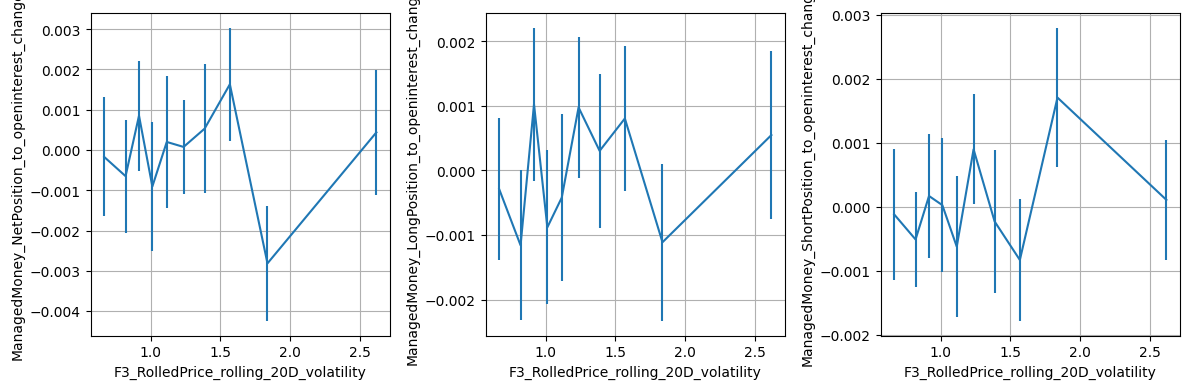

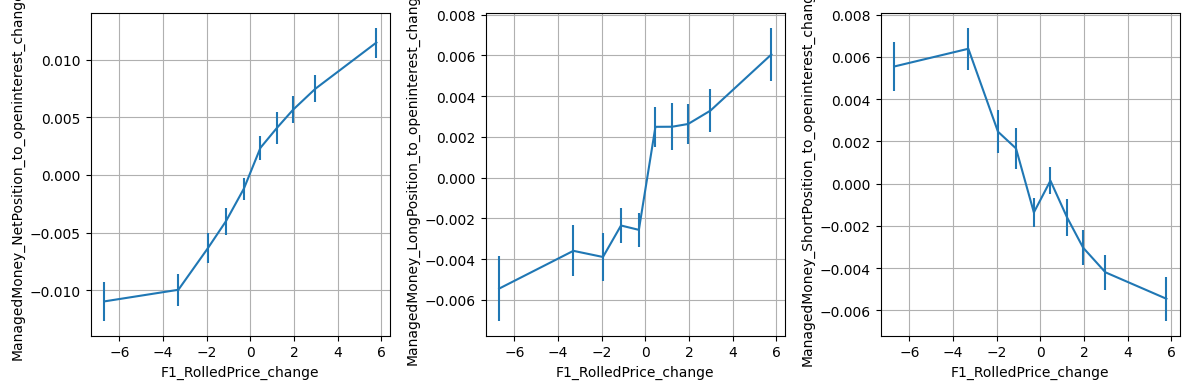

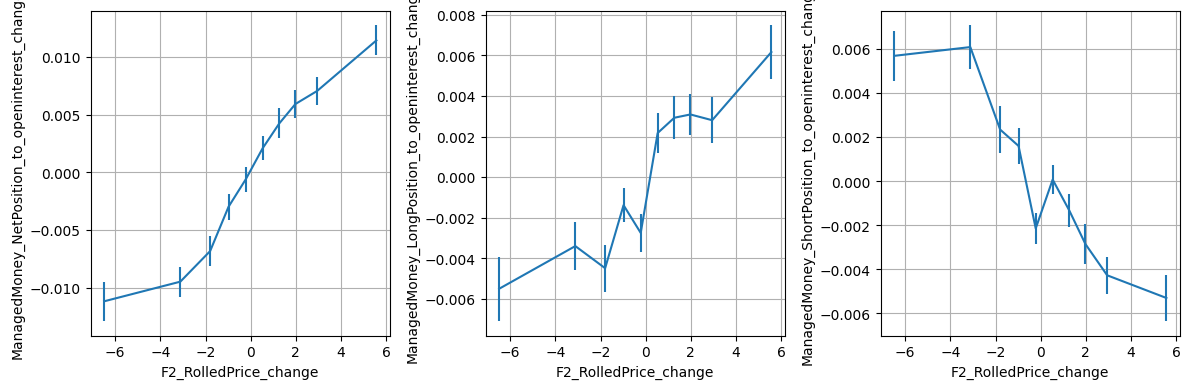

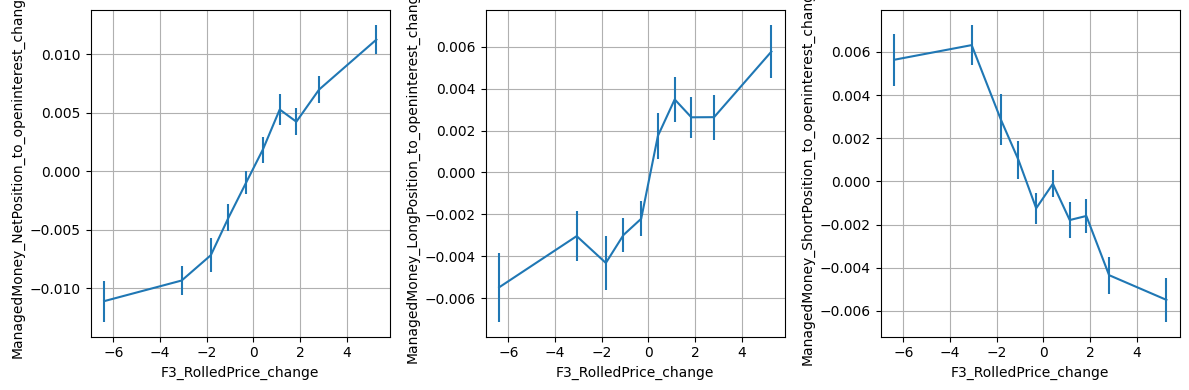

In [47]:
for  f  in feature_names:
    plt.rcParams["figure.figsize"] = (12,4)
    plt.subplot(1, 3, 1)
    _=plot_bin_summary_of_xy(
                    x = dataset[f],
                    y = dataset['ManagedMoney_NetPosition_to_openinterest_change'],
                    k= 10 ,
        xlabel = f, 
        ylabel = 'ManagedMoney_NetPosition_to_openinterest_change'
      )
    plt.grid()    
    plt.subplot(1, 3, 2)
    _=plot_bin_summary_of_xy(
                    x = dataset[f],
                    y = dataset['ManagedMoney_LongPosition_to_openinterest_change'],
                    k= 10 ,
        xlabel = f, 
        ylabel = 'ManagedMoney_LongPosition_to_openinterest_change'
      )
    plt.grid()    
    plt.subplot(1, 3, 3)
    _=plot_bin_summary_of_xy(
                    x = dataset[f],
                    y = dataset['ManagedMoney_ShortPosition_to_openinterest_change'],
                    k= 10 ,
        xlabel = f, 
        ylabel = 'ManagedMoney_ShortPosition_to_openinterest_change'
      )
    plt.tight_layout()
    
    plt.grid()
    plt.show()
    plt.close()

In [48]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [49]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [50]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [51]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [56]:
Xy = dataset[['tradeDate']+feature_names+unscaled_response_names+scaled_response_names].dropna()
Xy.reset_index(drop=True, inplace= True)

In [57]:
relevance_model = HistGradientBoostingRegressor(max_iter=10)
redundancy_model = HistGradientBoostingRegressor(max_iter=10)

In [58]:
from  research.feature_selection.master_selector import MasterSelector

In [59]:
selected_features_by_response = {}
for response in ['ManagedMoney_NetPosition_change',
                'ManagedMoney_LongPosition_change',
                'ManagedMoney_ShortPosition_change',
                'ManagedMoney_NetPosition_to_openinterest_change',
                'ManagedMoney_LongPosition_to_openinterest_change',
                'ManagedMoney_ShortPosition_to_openinterest_change']:
    print(response)
    master_selector_builder = MasterSelector( cv = cv,
                                     relevance_model = relevance_model,
                                     redundancy_model = redundancy_model,
                                     feature_names  = feature_names,
                                     response_name  = response,
                                     feature_similarity_method  = 'pearson',
                                     is_classification  = False,
                                     verbose  = False
                                     ) 
    master_selector_builder.fit(dataset=Xy)
    selected_feature_names = master_selector_builder.selected_feature_names
    print(selected_feature_names)
    selected_features_by_response[response] = selected_feature_names

ManagedMoney_NetPosition_change
For q=39.0, the optimal variance is 1.0 , and objective function is 2192.38,and max random eigen value: 1.35,and # of signal factors: 6
['prior_cumulative_5D_F1MinusF2_Volume_change', 'prior_5D_F1_OI_change', 'prior_report_ManagedMoney_NetPosition_change', 'prior_report_ManagedMoney_LongPosition_to_openinterest_change', 'F3_RolledPrice_change']
ManagedMoney_LongPosition_change
For q=39.0, the optimal variance is 1.0 , and objective function is 2192.38,and max random eigen value: 1.35,and # of signal factors: 6
['prior_report_ManagedMoney_ShortPosition_to_openinterest_change', 'prior_5D_F1_OI_change', 'prior_5D_AGG_OI_change', 'F2_RolledPrice_change']
ManagedMoney_ShortPosition_change
For q=39.0, the optimal variance is 1.0 , and objective function is 2192.38,and max random eigen value: 1.35,and # of signal factors: 6
['prior_cumulative_5D_F2_Volume_change', 'prior_5D_F1_OI_change', 'prior_5D_AGG_OI_change', 'F1_RolledPrice_change']
ManagedMoney_NetPositi

In [4]:
selected_features_by_response

{'ManagedMoney_NetPosition_change': ['prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1_OI_change',
  'prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
  'F3_RolledPrice_change'],
 'ManagedMoney_LongPosition_change': ['prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change',
  'F2_RolledPrice_change'],
 'ManagedMoney_ShortPosition_change': ['prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_NetPosition_to_openinterest_change': ['prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_LongPosition_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_LongPosition_to_openinterest_change': ['prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'F3_RolledPrice_change',
  'prior_5D_F

In [60]:
import json
with open("wti_cot_mm_nowcast_selected_features_by_response.json", "w") as f:
    json.dump(selected_features_by_response, f)